In [93]:
import pandas as pd
import numpy as np 
import itertools
import keras
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array,load_img 
from keras.models import Sequential 
from keras import optimizers
from keras.preprocessing import image
from keras.layers import Dropout, Flatten, Dense 
from keras import applications 
from keras.utils.np_utils import to_categorical 
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
%matplotlib inline
import math 
import datetime
import time
from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [94]:
img_width, img_height = 224, 224 
 
top_model_weights_path = 'bottleneck_fc_model.h5'
train_data_dir = 'C:/Users/adith/Documents/Aloe_Vara_leaf_classification/test/train'
validation_data_dir = 'C:/Users/adith/Documents/Aloe_Vara_leaf_classification/test/val'
test_data_dir = 'C:/Users/adith/Documents/Aloe_Vara_leaf_classification/test/test'

batch_size = 32 

In [95]:
#Loading vgc16 model
vgg16 = applications.VGG16(include_top=False, weights='imagenet')
datagen = ImageDataGenerator(rescale=1. / 255) 
#needed to create the bottleneck .npy files

In [96]:
#__this can take an hour and half to run so only run it once. 
#once the npy files have been created, no need to run again. Convert this cell to a code cell to run.__
start = datetime.datetime.now()
 
generator = datagen.flow_from_directory( 
    train_data_dir, 
    target_size=(img_width, img_height), 
    batch_size=batch_size, 
    class_mode=None, 
    shuffle=False) 
 
nb_train_samples = len(generator.filenames) 
num_classes = len(generator.class_indices) 
 
predict_size_train = int(math.ceil(nb_train_samples / batch_size)) 
 
bottleneck_features_train = vgg16.predict(generator, predict_size_train) 
 
np.save('bottleneck_features_train.npy', bottleneck_features_train)
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)

Found 842 images belonging to 2 classes.
27/27 [==============================] - 118s 4s/step
Time:  0:01:58.219574


In [97]:
#__this can take an hour and half to run so only run it once. 
#once the npy files have been created, no need to run again. Convert this cell to a code cell to run.__
start = datetime.datetime.now()
 
generator = datagen.flow_from_directory( 
    validation_data_dir, 
    target_size=(img_width, img_height), 
    batch_size=batch_size, 
    class_mode=None, 
    shuffle=False) 
 
nb_train_samples = len(generator.filenames) 
num_classes = len(generator.class_indices) 
 
predict_size_train = int(math.ceil(nb_train_samples / batch_size)) 
 
bottleneck_features_validation = vgg16.predict(generator, predict_size_train) 
 
np.save('bottleneck_features_validation.npy', bottleneck_features_validation)
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)

Found 105 images belonging to 2 classes.
4/4 [==============================] - 17s 4s/step
Time:  0:00:17.631561


In [98]:
#__this can take an hour and half to run so only run it once. 
#once the npy files have been created, no need to run again. Convert this cell to a code cell to run.__
start = datetime.datetime.now()
 
generator = datagen.flow_from_directory( 
    test_data_dir, 
    target_size=(img_width, img_height), 
    batch_size=batch_size, 
    class_mode=None, 
    shuffle=False) 
 
nb_train_samples = len(generator.filenames) 
num_classes = len(generator.class_indices) 
 
predict_size_train = int(math.ceil(nb_train_samples / batch_size)) 
 
bottleneck_features_validation = vgg16.predict(generator, predict_size_train) 
 
np.save('bottleneck_features_test.npy', bottleneck_features_validation)
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)

Found 106 images belonging to 2 classes.
4/4 [==============================] - 18s 4s/step
Time:  0:00:17.857434


In [99]:
#training data
generator_top = datagen.flow_from_directory( 
   train_data_dir, 
   target_size=(img_width, img_height), 
   batch_size=batch_size, 
   class_mode='categorical', 
   shuffle=False) 
 
nb_train_samples = len(generator_top.filenames) 
num_classes = len(generator_top.class_indices) 
 
# load the bottleneck features saved earlier 
train_data = np.load('bottleneck_features_train.npy') 
 
# get the class labels for the training data, in the original order 
train_labels = generator_top.classes 
 
# convert the training labels to categorical vectors 
train_labels = to_categorical(train_labels, num_classes=num_classes)

Found 842 images belonging to 2 classes.


In [100]:
#validation data
generator_top = datagen.flow_from_directory( 
   validation_data_dir, 
   target_size=(img_width, img_height), 
   batch_size=batch_size, 
   class_mode='categorical', 
   shuffle=False) 
 
nb_train_samples = len(generator_top.filenames) 
num_classes = len(generator_top.class_indices) 
 
# load the bottleneck features saved earlier 
validation_data = np.load('bottleneck_features_validation.npy') 
 
# get the class labels for the training data, in the original order 
validation_labels = generator_top.classes 
 
# convert the training labels to categorical vectors 
validation_labels = to_categorical(validation_labels, num_classes=num_classes)

Found 105 images belonging to 2 classes.


In [101]:
#test data
generator_top = datagen.flow_from_directory( 
   test_data_dir, 
   target_size=(img_width, img_height), 
   batch_size=batch_size, 
   class_mode='categorical', 
   shuffle=False) 
 
nb_train_samples = len(generator_top.filenames) 
num_classes = len(generator_top.class_indices) 
 
# load the bottleneck features saved earlier 
test_data = np.load('bottleneck_features_test.npy') 
 
# get the class labels for the training data, in the original order 
test_labels = generator_top.classes 
 
# convert the training labels to categorical vectors 
test_labels = to_categorical(test_labels, num_classes=num_classes)

Found 106 images belonging to 2 classes.


In [102]:
#This is the best model we found. For additional models, check out I_notebook.ipynb
start = datetime.datetime.now()
model = Sequential() 
model.add(Flatten(input_shape=train_data.shape[1:])) 
model.add(Dense(100, activation=keras.layers.LeakyReLU(alpha=0.3))) 
model.add(Dropout(0.5)) 
model.add(Dense(50, activation=keras.layers.LeakyReLU(alpha=0.3))) 
model.add(Dropout(0.3)) 
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer=optimizers.RMSprop(learning_rate=1e-4),metrics=['acc'])

In [113]:
# history = model.fit(np.array(train_data), np.array(train_labels), epochs=7,batch_size=batch_size, validation_data=(np.array(validation_data), np.array(validation_labels)))
history = model.fit(train_data, train_labels, epochs=10,batch_size=batch_size, validation_data=(validation_data, validation_labels))
model.save_weights(top_model_weights_path)

Epoch 1/10
27/27 [==============================] - 0s 18ms/step - loss: 0.0148 - acc: 0.9941 - val_loss: 0.0577 - val_acc: 0.9810
Epoch 2/10
27/27 [==============================] - 0s 15ms/step - loss: 0.0086 - acc: 0.9976 - val_loss: 0.0532 - val_acc: 0.9810
Epoch 3/10
27/27 [==============================] - 0s 16ms/step - loss: 0.0078 - acc: 0.9976 - val_loss: 0.1113 - val_acc: 0.9714
Epoch 4/10
27/27 [==============================] - 0s 16ms/step - loss: 0.0163 - acc: 0.9929 - val_loss: 0.0582 - val_acc: 0.9810
Epoch 5/10
27/27 [==============================] - 0s 15ms/step - loss: 0.0086 - acc: 0.9976 - val_loss: 0.0551 - val_acc: 0.9714
Epoch 6/10
27/27 [==============================] - 0s 15ms/step - loss: 0.0036 - acc: 1.0000 - val_loss: 0.0957 - val_acc: 0.9810
Epoch 7/10
27/27 [==============================] - 0s 14ms/step - loss: 0.0104 - acc: 0.9976 - val_loss: 0.0760 - val_acc: 0.9714
Epoch 8/10
27/27 [==============================] - 0s 15ms/step - loss: 0.0061 - a

In [114]:
(eval_loss, eval_accuracy) = model.evaluate(validation_data, validation_labels, batch_size=batch_size,verbose=1)
print("[INFO] accuracy: {:.2f}%".format(eval_accuracy * 100)) 
print("[INFO] Loss: {}".format(eval_loss)) 
end= datetime.datetime.now()
elapsed= end-start 
print ('Time: ', elapsed)

4/4 [==============================] - 0s 5ms/step - loss: 0.0842 - acc: 0.9714
[INFO] accuracy: 97.14%
[INFO] Loss: 0.08424137532711029
Time:  0:01:07.815613


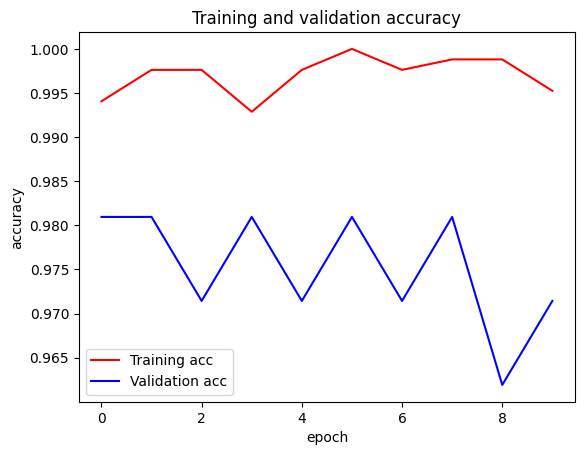

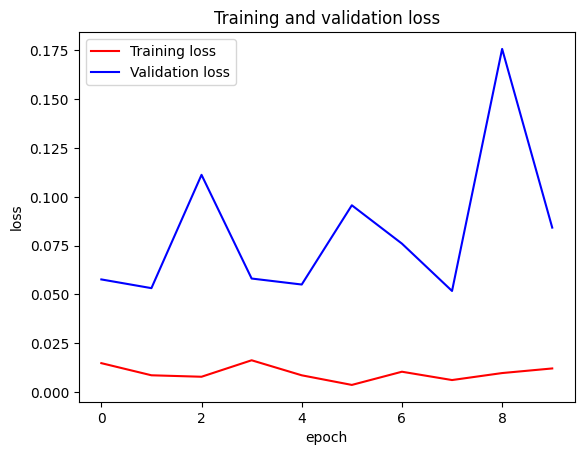

In [115]:
#Graphing our training and validation
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.ylabel('accuracy') 
plt.xlabel('epoch')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('loss') 
plt.xlabel('epoch')
plt.legend()
plt.show()

In [116]:
model.evaluate(test_data,test_labels)

4/4 [==============================] - 0s 5ms/step - loss: 0.1363 - acc: 0.9623


[0.1363314390182495, 0.9622641801834106]

In [129]:
preds= np.round(model.predict(test_data), 0)
test_labels

4/4 [==============================] - 0s 4ms/step


array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.

In [124]:
labels = ['Infected','Healthy']
classification_matrics=metrics.classification_report(test_labels,preds,target_names=labels)
print(classification_matrics)

              precision    recall  f1-score   support

    Infected       1.00      0.92      0.96        53
     Healthy       0.93      1.00      0.96        53

   micro avg       0.96      0.96      0.96       106
   macro avg       0.96      0.96      0.96       106
weighted avg       0.96      0.96      0.96       106
 samples avg       0.96      0.96      0.96       106



In [125]:
print("Accuracy:",accuracy_score(preds,test_labels))

Accuracy: 0.9622641509433962


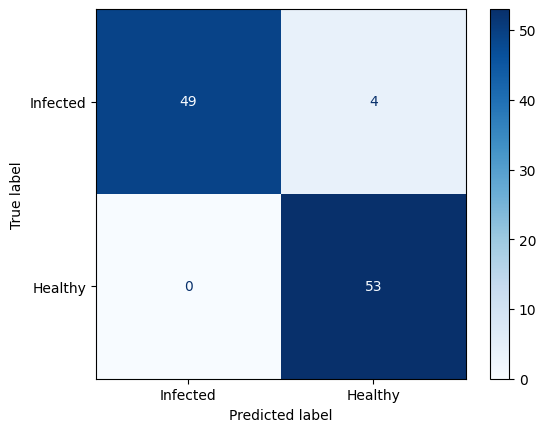

In [126]:
# test_data_classes=list(pd.DataFrame(test_labels).idxmax(axis=1))
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay
categorical_test_labels = pd.DataFrame(test_labels).idxmax(axis=1)
categorical_preds = pd.DataFrame(preds).idxmax(axis=1)
cm = confusion_matrix(categorical_test_labels.to_numpy(), categorical_preds.to_numpy())

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

disp.plot(cmap=plt.cm.Blues)
plt.show()

In [121]:
from tensorflow.keras.models import load_model
import os

In [122]:
model.save(os.path.join('models','maintrain2.h5'))